In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from scipy.cluster.hierarchy import dendrogram, linkage

A continuación mostraré parte de los resultados obtenidos y analisados para le capitulo 3 de mi tesis de doctorado.

Comenzamos importando las bibliotecas que vamos a necesitar y los datos.

Se trata de un dataset de los 30 ratones controles y 22 lesionados entrenados 9 días en una prueba de discriminación adentro de una caja completamente automatizada 
que les entrega alimento cuando meten la nariz en un agujero.
Los ratones debian aprender que uno de los dos agujeros de la caja le entrega 5 pellets de alimento y otro 1.

Los animales con "lesión" fueron operados meses atras y se le eliminó selectivamente un tipo de neuronas específico de una región específica, llamadas Interneruonas Colinérgicas Estriatales o ICE. 
Son cerca del 1% de las neuronas del estriado, asi que entenderan que perdieron muy pocas neuronas.
Se les hicieron muuuuchos controles que muestran que estos ratones son perfectamente "normales" (indistingibles de los control en grandes baterias de test comportamentales).

---
Luego de algunas sesiones de habituación, comienza el entrenamiento. Veamos cómo les fue.
Comencemos graficando el desempeño, entiendiendo por desemepeno el cómo adquieren una preferencia por el puerto que entrega más recompensas
(puede que suene un poco antropocéntrico pero lo tradicional en estya tarea es esperar que los animales tiendan a preferir el puerto que entrega 5 pellets).

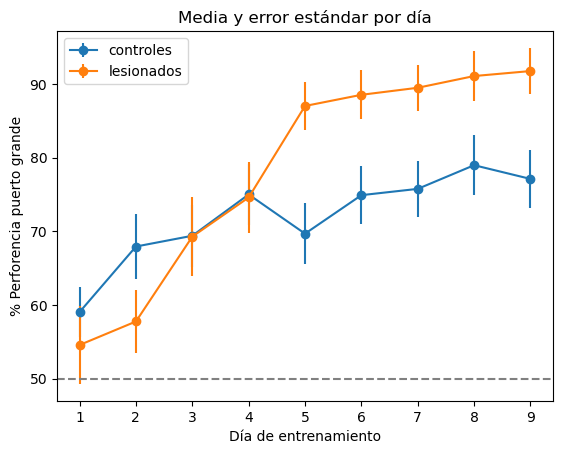

In [3]:
path = "C:/Users/bk_ri/Dropbox/Papaer JP OC/Excells para R"
os.chdir(path)
performance_todos = pd.read_excel('curva_aprendizaje.xlsx', header=None)

# Importamos los animales, los separamos en controles y lesionados
# sabiendo que los primeros 30 animales son controles, los siguientes 22, lesionados.

dias = np.arange(1, 10)
performance_ctl = performance_todos.iloc[0:31]
performance_lesion = performance_todos.iloc[31:]

# Y graficamos su performance

medias_ctl = np.mean(performance_ctl, axis=0)
se_ctl = np.std(performance_ctl, axis=0) / np.sqrt(performance_ctl.shape[0])

medias_lesion = np.mean(performance_lesion, axis=0)
se_lesion = np.std(performance_lesion, axis=0) / np.sqrt(performance_lesion.shape[0])



plt.errorbar(dias, medias_ctl.values, yerr=se_ctl.values, fmt='-o')
plt.errorbar(dias, medias_lesion.values, yerr=se_lesion.values, fmt='-o')
plt.xlabel('Día de entrenamiento')
plt.ylabel('% Perforencia puerto grande')
plt.title('Media y error estándar por día')
plt.legend(["controles", "lesionados"])
plt.axhline(50, ls='--', color='gray')
plt.show()

Pareciera que a los ratones lesionados les va mejór en la tarea, no? Aprenden más y más rápido. Veamos si esto es estadísticamente cierto.

Un ANOVA mixto es la herramienta por excelencia para evevaluar la interacción entre el efecto de un factor entre-sujeros como es tratamiento (en este caso la lesión o cirugia control) 
y facotr intra-sujetos (como es en este caso el tiempo, o los sucesivos entrenamientos).

In [4]:
# los datos que importamos tiene la forma de una serie tempral o "wide", donde cada columna es un día, y cada fila un animal.
# Para el ANOVA y en general las librerias de modelos estadpísiticos prefieren el formato "largo" donde cada fila es un animal en un día.

performance_ctl_long = pd.melt(performance_ctl.reset_index(), id_vars='index', value_vars=performance_ctl.columns)
performance_ctl_long.columns = ['animal', 'dia', 'valor']

performance_lesion_long = pd.melt(performance_lesion.reset_index(), id_vars='index', value_vars=performance_lesion.columns)
performance_lesion_long.columns = ['animal', 'dia', 'valor']

In [5]:
# Veamos como era
performance_ctl

,0,1,2,3,4,5,6,7,8
0,11.764706,20.689655,60.000000,100.000000,31.818182,31.818182,52.941176,64.285714,31.818182
1,60.000000,21.428571,50.000000,90.909091,50.000000,83.333333,64.285714,100.000000,83.333333
2,64.285714,90.909091,90.909091,90.909091,76.923077,90.909091,83.333333,90.909091,76.923077
3,50.000000,83.333333,83.333333,44.444444,52.941176,76.923077,71.428571,100.000000,56.250000
4,60.000000,90.909091,44.444444,40.000000,44.444444,90.909091,100.000000,83.333333,100.000000
5,71.428571,90.909091,64.285714,83.333333,71.428571,71.428571,76.923077,71.428571,56.250000
6,56.250000,83.333333,76.923077,60.000000,64.285714,71.428571,23.076923,26.923077,44.444444
7,76.923077,76.923077,90.909091,100.000000,64.285714,52.941176,64.285714,90.909091,100.000000
8,71.428571,83.333333,100.000000,90.909091,90.909091,100.000000,100.000000,100.000000,100.000000
9,64.285714,83.333333,100.000000,90.909091,100.000000,100.000000,60.000000,100.000000,90.909091


In [6]:
# Veamos como quedó
performance_ctl_long

,animal,dia,valor
0,0,0,11.764706
1,1,0,60.000000
2,2,0,64.285714
3,3,0,50.000000
4,4,0,60.000000
...,...,...,...
274,26,8,64.285714
275,27,8,100.000000
276,28,8,60.000000
277,29,8,100.000000


In [7]:
# # le agregamos una columna "grupo" y un tag "C" o "L" a cada dataset segun corresponda.

performance_ctl_long = performance_ctl_long.assign(grupo=pd.Series(['C']*len(performance_ctl_long)).values)
performance_lesion_long = performance_lesion_long.assign(grupo=pd.Series(['L']*len(performance_lesion_long)).values)

# concatenamos los dataset, y les agregamos keys que señalen a qué grupo pertenecen, "control" o "lesion"
# performance_todos = pd.concat([performance_ctl_long, performance_lesion_long], keys=['control', 'lesion'])
performance_todos = pd.concat([performance_ctl_long, performance_lesion_long])
performance_todos


,animal,dia,valor,grupo
0,0,0,11.764706,C
1,1,0,60.000000,C
2,2,0,64.285714,C
3,3,0,50.000000,C
4,4,0,60.000000,C
...,...,...,...,...
193,48,8,100.000000,L
194,49,8,100.000000,L
195,50,8,100.000000,L
196,51,8,52.941176,L


In [8]:
import pingouin as pg
aov = pg.mixed_anova(dv='valor', within='dia', between='grupo', subject='animal', data=performance_todos)
# aov = pg.rm_anova(dv='valor', within=['grupo', 'dia'], subject='animal', data = performance_todos)
# model = pg.rm_anova(data=performance_todos, dv='valor', within=["dia", "grupo"], subject='animal')

C:\Users\bk_ri\AppData\Roaming\Python\Python310\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\bk_ri\AppData\Roaming\Python\Python310\site-packages\pingouin\parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


In [9]:
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2        MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  ---------  -----  -----  --------  ------  -------  -----------  -----  -------  ------------  ---------  ---------
grupo         4526.650      1     51  4526.650   2.192    0.145      nan      0.041  nan           nan        nan        nan
dia          37084.836      8    408  4635.605  17.686    0.000        0.000  0.257    0.520         0.000      0.056      0.000
Interaction  10394.118      8    408  1299.265   4.957    0.000      nan      0.089  nan           nan        nan        nan



Efectivamente, tal como pensábamos, hay una interación entre los entrenamientos a lo largo del tiempo y el tratamiento que recibieron los animales.
Hagamos un post-hoc para ver dónde estan esas diferenicias.
Dado que los posthoc hacen comparaciones pareadas todos vs. todos, es recomendable hacer una correción del p-value por multiples comparaciones.
Miremos solo aquellas comparaciones cuyo p-value es sifnificativo.
Tambien, siendo que la interación fue significativa, mirar los post hoc de los efectos principales pierde un poco de sentido..

In [10]:
posthocs = pg.pairwise_tests(dv='valor', within='dia', between='grupo', subject='animal', data=performance_todos, padjust='bonf')
#posthocs[posthocs['p-unc']<=0.05] 
posthocs[(posthocs['p-unc']<=0.05) & (posthocs['Contrast']=='dia * grupo')] 

,Contrast,dia,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
41,dia * grupo,4,C,L,False,True,-3.239613,50.713644,two-sided,0.002115,0.019036,bonf,16.755,-0.829761
42,dia * grupo,5,C,L,False,True,-2.596533,50.988736,two-sided,0.012274,0.110464,bonf,4.099,-0.674378
43,dia * grupo,6,C,L,False,True,-2.743390,50.999969,two-sided,0.008371,0.075337,bonf,5.529,-0.710776
44,dia * grupo,7,C,L,False,True,-2.229820,50.998290,two-sided,0.030189,0.271704,bonf,2.065,-0.578311
45,dia * grupo,8,C,L,False,True,-2.840270,50.886707,two-sided,0.006465,0.058187,bonf,6.787,-0.730602


Se puede ver que los grupos se diferencian a partir del día 5! (dice 4 pero porque para el dataset dia 1 = 0)

---
Un analisis tradicional de esta tarea hubiera resuleto que los animales con lesion de las ICE mejoran en el desempeño de una tarea de discriminación.
Palo y a la bolsa.

Sin embargo, a nosotros nos llamó la atención la mejoría en el rendimiento de los animales lesionados. 
No es normal encontrar ejemplos en la naturaleza en la que uno DISRTUMPE un sistema y el sistema "funciona mejor". Menos aún si quello que estamos quitando son las ICE que (les cuento) 
son interneuronas relacionadas con el señalamiento de eventos ambientales salientes, y que se propone, pueden tener un interés para tareas dirigidas a metas como esta, como estas.


¿Que puede estar pasando aca? por qué no tener neuronas colinérgicas hace que los animales presenten un mejor desempeño en la tarea?
¿puede que estemos malinterpretando esos resultados? 

Esa es nuestra hipótesis. Quizás los animales estaban haciendo cosas que no esperamos.
Se nos ocurrió encarar un analisis más complejo de la conducta. 
Alimantar a algun alguritmo con variables que describan otros aspectos de la conducta, más alla de la sola performance, para ver si lograbamos describir
"estrategias" de realización de la tarea. 

Quiero destacar que este tipo abordajes, como el de usar algoritmos de aprendizaje automatizado, para el campo de conducta de ratones es una RAREZA. 
Es un capo muy conservador, que se limita siempre al mismo grupo de tareas - test - interpreataciones desde Skinner a esta parte. 


Entonces recogimos features comportamentales de los todos los animales a lo largo de todos los días de entrenamiento.
Aprovechando que la tarea es en una CAJA OPERANTE, conectada a una PC, hay variables muy piolas como la latencia al hacer una respuetsa, medida con la precisión del milisegundo. 
En resumen, recolectamos features de muchos tipos, buscaron cubrir la mayor cantidad de aspectos posobiles y que pudieran estar afectanto el desempeño de los animales, como la motivacion, la memoria; 
asi como buscamos variables que nos permitan describir qué estaban haciendo los aniamles en la tarea, como la latencia de la respuesta, cantidad, tipo y dinámica de los errores que comente, 
entre otras varias.

Recogimos 16 features, que es un monton. Más aun teniendo en cuenta los poquitos animales que tenemos (52 animales para un experimento de conucta, tambien es un monton, 
pero es poco para un problema de analisis de dato con herramientas de aprendizaje automatizado). 
Es aconsejable, por muchos motivos que no vienen al caso, reducir la dimensionalidad del problema. El abordaje más utilizado, es PCA.

Scikitlear es por lejos la biblioteca más utilizada para este tipo de analisis.
Como su función PCA no normaliza los datos, en caso de querer hacerlo, debemos entregarsdelo así.

Para normalzar vamos a darle los datos de TODOS los animales, lesionados o no. 
Pero luego vamos a querer caracterizar solo a los controles.


---
Hay muchas decisiones que tomar. Con cuantos componentes principales nos quedamos? Una vez decidido esto, nos quedamos con las variables origiales, más amigables para interpretar, 
o transformamos nuestro dataset en el espacio recreado a partir de los componentes principales elegidos?

Nuevamente hay muchos argumentos a favor y en contra. Para abordar el primero de estos temas, podriamos decir que los criterios más usados son:

- Criterio de la varianza explicada: Podemos trazar la fracción de la varianza total explicada en función del número de componentes principales. 
Luego, podemos seleccionar el número de componentes principales donde la fracción de varianza explicada comienza a "nivelarse". 
Esto se puede hacer utilizando el método explained_variance_ratio_ en la clase PCA de scikit-learn.

- Criterio de la varianza acumulada: Podemos trazar la cantidad acumulada de varianza explicada en función del número de componentes principales. 
Luego, podemos seleccionar el número de componentes principales donde la cantidad acumulada de varianza explicada alcanza un umbral predefinido, por ejemplo, el 80% de la varianza total.

- Criterio del codo: Podemos trazar la magnitud de la varianza explicada en función del número de componentes principales. 
Luego, podemos seleccionar el número de componentes principales donde la magnitud de la varianza explicada comienza a "aplanarse" o formar un "codo".

Miremos un poco por arriba que pinta tienen:


In [11]:
# Definimos el escalador, que en este caso es MinMaxScaler para que lleve los valores entre 0 a 1 pero mantenga la relación entre los mismos.
# lo creo más conveniente que StandardScaler

df = pd.read_excel('dia9_cyl_conducta_raw.xlsx')

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df_norm[0]

# y nos quedamos con los controles

df_ctl = df_norm[:31,:]
df_ctl = pd.DataFrame(df_ctl)

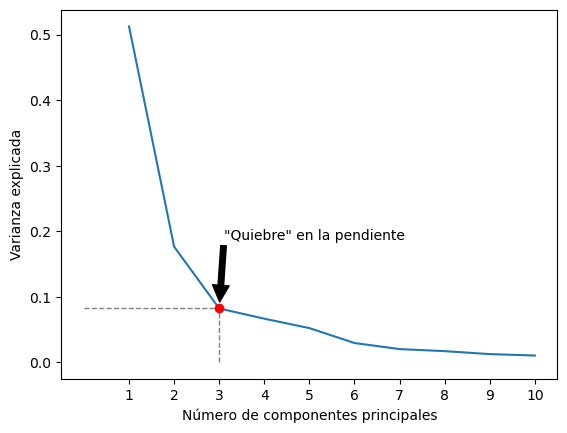

In [12]:
# Método del codo 

pca = PCA(n_components=10)
pca.fit(df_ctl)

variance = pca.explained_variance_ratio_


plt.plot(range(1, 11), variance)
plt.xlabel('Número de componentes principales')
plt.xticks(range(1, 11))
plt.ylabel('Varianza explicada')

point_x, point_y = 3, variance[2]
plt.scatter(point_x, point_y, color='red', zorder=2)
plt.vlines(point_x, ymin=0, ymax=point_y, colors='gray', linestyles='dashed', linewidth=1, zorder=1)
plt.hlines(point_y, xmin=0, xmax=point_x, colors='gray', linestyles='dashed', linewidth=1, zorder=1)

plt.annotate('"Quiebre" en la pendiente', xy=(point_x+0.01, point_y+0.01), xytext=(point_x+0.1, point_y+0.1),
             arrowprops=dict(facecolor='black', shrink=1),
             fontsize=10, color='black', horizontalalignment='left', verticalalignment='bottom')
plt.show()

# Nos quedamos con 3 componentes principales.
n_components = 3

pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)

In [13]:
# Método de varianza explicada

# obtener la proporción de varianza explicada por cada componente
# var_exp = pca.explained_variance_ratio_

# establecer el porcentaje deseado de varianza total explicada
desired_var_exp = 0.80

# establecer el número mínimo de componentes necesarios para alcanzar el porcentaje deseado
n_components = np.argmax(np.cumsum(variance) >= desired_var_exp) + 1
print(n_components)

# reducir la matriz de datos a los primeros n componentes principales
# X_reduced = PCA(n_components=n_components).fit_transform(X)

4


In [14]:
print(f'Si nos quedamos con los primeros 3 componentes, obtendremos una Varinza acumulada de {round(np.cumsum(variance[0:3])[2],4)*100}%')
print(f'Si nos quedamos con los primeros 4 componentes, obtendremos una Varinza acumulada de {round(np.cumsum(variance[0:4])[3],3)*100}%')

Si nos quedamos con los primeros 3 componentes, obtendremos una Varinza acumulada de 77.12%
Si nos quedamos con los primeros 4 componentes, obtendremos una Varinza acumulada de 83.8%


Ya con tres componentes explicamos el 77% de la varianza. Más aun el "criterio del codo" nos muestra que hay una desaceleración de la varianza explicada cuando pasamos a incorporar un 4to componente,
y más aún otros luego de él. Por lo que quizas, "quedarnos" con más componentes complejiza demasiado el problema y no nos aporta tanta información a cambio.

En la literatura es comun quedarse con dos o tres componentes, como máximo, muchas veces por la simplicidad de graficar los reusltados despues. Estamos mucho más acostumbrados a pensar problemas
en tres dimensiones que en más!

Ahora bien, seguimos ramificando nuestras decisiones! Ya definimos que nos quedaremos con 3 componentes principales pero como afecta esto nuestra matriz de variables de partida?

Hay dos grandes escuelas, o transformamos nuestros datos de partidas en este nuevo sistema de referencia que los tres ejes de PCA nos dan o los quedamos con las variables originales, pero solo con
aquellas que "más contribullan" a los componentes principales seleccioandos.

Hay pros y contras para cada una. 
En resumidas cuentas, transformar nuestras variables tiene la ventaja de que no se pierde información en el proceso de selección de variables. 
Además, permite encontrar patrones complejos en los datos que pueden no ser evidentes al observar las variables originales por separado.
Este enfoque también puede resultar en componentes que son difíciles de interpretar debido a que cada variable contribuye de manera diferente a cada componente principal.

Podemos quedarnos con aquella/as variable/es que más contribuyan a explicar la varianza 
Este enfoque es más fácil de interpretar porque solo se consideran las variables más importantes para cada componente principal. 
Naturalmente se pierde más información por que se truncan todas las variables que no se seleccionen.


Teniendo en cuenta que nuestra idea por la cual usamos PCA era reducir la dimencionalidad del problema, y que nos interesa mantener la identidad y transparencia de las variables que usemos para
un uso futuro, nos quedaremos con el segundo método.


que a su vez cubre cada componente principal, o podemos pasar a utilizar variables artificiales contruidas a partir de este nuevo sistema de referencia que el PCA establece. 
Por un cariño por la transparencia en la interprtacion de variables (entre otros motivos, algunos un poco más científicos), nos quedamos con la primera opción.

Ahora, ¿con cuantos componentes del PCA nos quedamos? ¿Con cuantas variables de cada componente? Una vez más, existen escuelas para esto. Vamos a ir explorándolos:


In [15]:
# De acuerdo a Abergel y col., 2017, quedarse con la variable de mayor Eigenvalue cuadrado es un criterio razonable para hacer feature selection.
# Creemos la tabla:

pca = PCA()
pca.fit(df_ctl)

eigenvectors = pca.components_

variables = df.columns
eigenvectors_df = pd.DataFrame(eigenvectors, columns=variables)

# Es necesario transponer
eigenvectors_df = eigenvectors_df.T

# Renombrar las columnas para indicar que a que CP corresponde
eigenvectors_df.columns = [f"Eigenvectors CP_{i+1}" for i in range(len(eigenvectors))]

print(eigenvectors_df**2)

    Eigenvectors CP_1  Eigenvectors CP_2  Eigenvectors CP_3  \
1            0.129295           0.006601           0.040296   
2            0.227200           0.006964           0.007786   
3            0.047705           0.147307           0.037489   
4            0.004724           0.197905           0.006267   
6            0.023033           0.093950           0.009254   
7            0.000558           0.029104           0.076751   
8            0.000348           0.058198           0.028125   
9            0.000115           0.029744           0.010100   
10           0.192749           0.000753           0.101596   
13           0.099576           0.056101           0.221250   
14           0.085767           0.046509           0.180452   
15           0.006430           0.097811           0.044134   
16           0.017146           0.122614           0.000044   
17           0.012592           0.018091           0.031500   
18           0.014585           0.080907           0.11

In [16]:
# Quedémosnos con los 4 primeros, ya que vimos que los primeros 3 y 4 CP explican la mayor parte de la varianza.
max_indices = (eigenvectors_df**2).idxmax()

# Convertir los resultados a una lista
max_indices_list = max_indices.tolist()

print("Lista con el nombre del índice que tiene el valor más alto para cada columna:")
max_indices_list[0:4]

Lista con el nombre del índice que tiene el valor más alto para cada columna:


[2, 4, 13, 8]

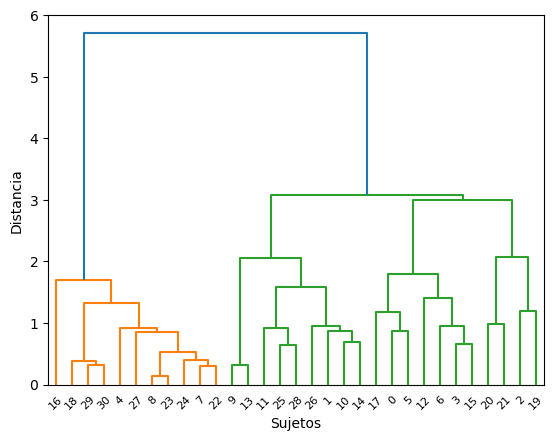

In [22]:
# Habiendo más o menos decidido con cuanyas variables nos quedamos, podemos pasar a estudiar cómo se agrupa el comportamiento de los animales control
# Para eso usaremos un dendrograma o clusterin jerárquico de las las variables comportamentales recolectadas, que relacione a los animales de acuerdo a cuan similares son en la tarea que realiaron.

# Python está medio verde en lo que a creacion y postprocesamiento de dendrogramas respecta.... asi que vamos a ver que podemos hacer.
# Al menos la función de creacion de dendrogramas está:

#Creemos dos dendrogramas, uno con todas las features y otra solamente con las features que recortamos. Tener en cuenta que el uso de todas puede pecar de sobredimensionar el peso de alguna feature, siedo que es
# probable que haya colinealidad entre las features. El uso del PCA redujo ese efecto.


dist_matrix = linkage(df_ctl, 'ward')
dendrogram((dist_matrix))
plt.xlabel('Sujetos')
plt.ylabel('Distancia')
plt.show()


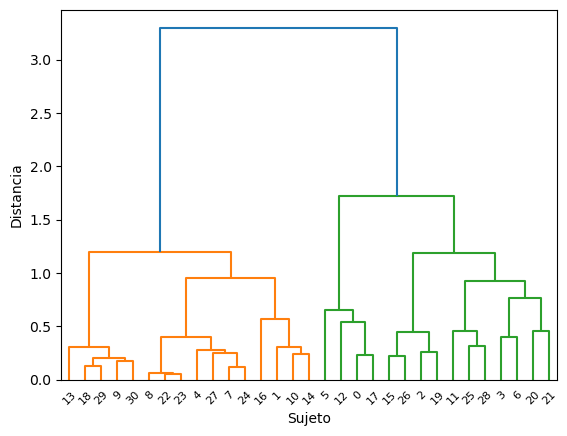

In [21]:
# Primero seleccionamos de los datos originales solo las variables que elegimos, despues creamos la matriz de distancias y finalmente, construimos el dendro:
# Y ahora usando solo las variables seleccionadas por el PCA

columnas_seleccionadas = df_ctl.iloc[:, max_indices_list[0:4]]
dist_matrix = linkage(columnas_seleccionadas, 'ward')
dendrogram((dist_matrix))
plt.xlabel('Sujetos')
plt.ylabel('Distancia')
plt.show()

Nótese que los dendrogramas de 19 vs 4 features se parecen bastate! En ambos casos parecieran formarse dos clusters (algo que no es para nada trivial) y hay un core de animales que sistemáticamente se muestra agupado, aunque es verdad que hay otros que parecieran estar en uno u otro grupo dependiendo de las variables que se evaluen. Pero hay un core de 11 animales que suelen estar en el grupo "naranja" y 15 animales, en el "verde".

Desafortunadamente Python a la fecha no cuenta con bibliotecas de alto nivel para el analalisis de dendrogramas como en entanglement y el indice de correlacion de Baker.